<a href="https://colab.research.google.com/github/jingfang95/case_study/blob/main/Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import timedelta
import warnings
warnings.filterwarnings('ignore')

#### Load dataset and check missing value

In [ ]:
data = pd.read_excel('data_manipulation_for_interview_202109.xlsx', sheet_name='data')
data.head(5)

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled
0,1,5dbb7b2af50df923e06c9973,0,5dbb7b29f50df923e06c9970,revolving,400.0,257.0,150.0,MIN,8.0,2019-07-17,2019-10-12,NaT,2019-09-03,2019-11-01 00:24:10.245
1,2,5dbb7b2af50df923e06c9973,1,5dbb7b29f50df923e06c9970,installment,NaN,38910.0,15656.0,75,672.0,2015-04-18,2019-09-30,NaT,2019-08-27,2019-11-01 00:24:10.245
2,3,5dbb7b2af50df923e06c9973,2,5dbb7b29f50df923e06c9970,installment,NaN,32636.0,32018.0,108,461.0,2019-05-09,2019-09-30,NaT,2019-09-24,2019-11-01 00:24:10.245
3,4,5dbb7b2af50df923e06c9973,3,5dbb7b29f50df923e06c9970,installment,NaN,40143.0,0.0,73,NaN,2014-06-21,2019-07-08,2019-07-08,2019-07-08,2019-11-01 00:24:10.245
4,5,5dbb7b2af50df923e06c9973,4,5dbb7b29f50df923e06c9970,installment,NaN,4000.0,0.0,36,NaN,2015-11-06,2017-10-07,2017-10-07,2017-10-07,2019-11-01 00:24:10.245


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24837 entries, 0 to 24836
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       24837 non-null  int64         
 1   credit_report_id         24837 non-null  object        
 2   tradeline_index          24837 non-null  int64         
 3   user_id                  24837 non-null  object        
 4   portfolioType            24837 non-null  object        
 5   creditLimit              12685 non-null  float64       
 6   highCredit               24810 non-null  float64       
 7   currentBalance           24701 non-null  float64       
 8   terms_in_month           17615 non-null  object        
 9   scheduledMonthlyPayment  9245 non-null   float64       
 10  dateOpened               24833 non-null  datetime64[ns]
 11  dateReported             24837 non-null  datetime64[ns]
 12  dateClosed               13957 n

In [ ]:
data.describe()

,id,tradeline_index,creditLimit,highCredit,currentBalance,scheduledMonthlyPayment
count,24837.000000,24837.000000,12685.000000,2.481000e+04,2.470100e+04,9245.000000
mean,12419.000000,20.349720,3088.960899,1.390440e+04,4.778116e+03,207.448675
std,7169.968654,24.251006,8288.584469,5.192883e+04,3.113697e+04,384.993762
min,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000
25%,6210.000000,7.000000,500.000000,7.510000e+02,0.000000e+00,35.000000
50%,12419.000000,14.000000,1300.000000,2.216500e+03,0.000000e+00,76.000000
75%,18628.000000,26.000000,3000.000000,8.037000e+03,1.274000e+03,239.000000
max,24837.000000,263.000000,265000.000000,1.942250e+06,1.917688e+06,12003.000000


In [52]:
# print(pd.options.display.max_rows)
# pd.options.display.max_columns = 0
# for i in ['creditLimit', 'highCredit', 'currentBalance', 'scheduledMonthlyPayment']:
data.groupby(['portfolioType'])[['creditLimit']].describe()

creditLimit                ...                   
                    count          mean  ...      75%       max
portfolioType                            ...                   
installment           0.0           NaN  ...      NaN       NaN
lineOfCredit        242.0  23290.004132  ...  21775.0  265000.0
mortgage              0.0           NaN  ...      NaN       NaN
open                  0.0           NaN  ...      NaN       NaN
revolving         12443.0   2696.077152  ...   3000.0  176000.0

[5 rows x 8 columns]

In [53]:
data.groupby(['portfolioType'])[['highCredit']].describe()

highCredit                 ...                     
                   count           mean  ...       75%        max
portfolioType                            ...                     
installment      10901.0   11096.223282  ...   15000.0  1206940.0
lineOfCredit       244.0   22127.754098  ...   15548.0   295607.0
mortgage           873.0  215799.278351  ...  276070.0  1942250.0
open               280.0    3176.996429  ...    2635.0    69584.0
revolving        12512.0    2343.897219  ...    2522.0   176952.0

[5 rows x 8 columns]

In [54]:
data.groupby(['portfolioType'])[['currentBalance']].describe()

currentBalance                ...                     
                       count          mean  ...       75%        max
portfolioType                               ...                     
installment          10843.0   3595.474961  ...   1304.00   862213.0
lineOfCredit           240.0  10503.679167  ...   3477.75   265807.0
mortgage               857.0  70177.359393  ...  97155.00  1917688.0
open                   281.0   2706.334520  ...   1166.00    82774.0
revolving            12480.0   1251.213462  ...   1180.00   134000.0

[5 rows x 8 columns]

In [ ]:
account_data = data[['id', 'portfolioType', 'dateOpened']].copy()
account_data = account_data[account_data['dateOpened'].notnull()]
account_data.head(5)

,id,portfolioType,dateOpened
0,1,revolving,2019-07-17
1,2,installment,2015-04-18
2,3,installment,2019-05-09
3,4,installment,2014-06-21
4,5,installment,2015-11-06


In [ ]:
def convert_date_to_season(date):
  return f'{date.year} Q{(date.month + 2) // 3}'

In [ ]:
account_data['seasonOpened'] = account_data['dateOpened'].apply(convert_date_to_season)
account_data.head(5)

,id,portfolioType,dateOpened,seasonOpened
0,1,revolving,2019-07-17,2019 Q3
1,2,installment,2015-04-18,2015 Q2
2,3,installment,2019-05-09,2019 Q2
3,4,installment,2014-06-21,2014 Q2
4,5,installment,2015-11-06,2015 Q4


In [ ]:
account_opened = account_data.groupby(['seasonOpened', 'portfolioType'])[['id']].count()
account_opened = account_opened.reset_index()
account_opened.columns = ['seasonOpened', 'portfolioType', 'numOfAccounts']
account_opened.head(5)

,seasonOpened,portfolioType,numOfAccounts
0,1964 Q4,revolving,1
1,1965 Q2,revolving,2
2,1965 Q4,revolving,1
3,1973 Q1,revolving,1
4,1974 Q3,open,1


In [35]:
def find_data_after_2010(season):
  return int(season.split()[0]) >= 2010

In [36]:
account_opened_after_2010 = account_opened[account_opened['seasonOpened'].apply(find_data_after_2010)]

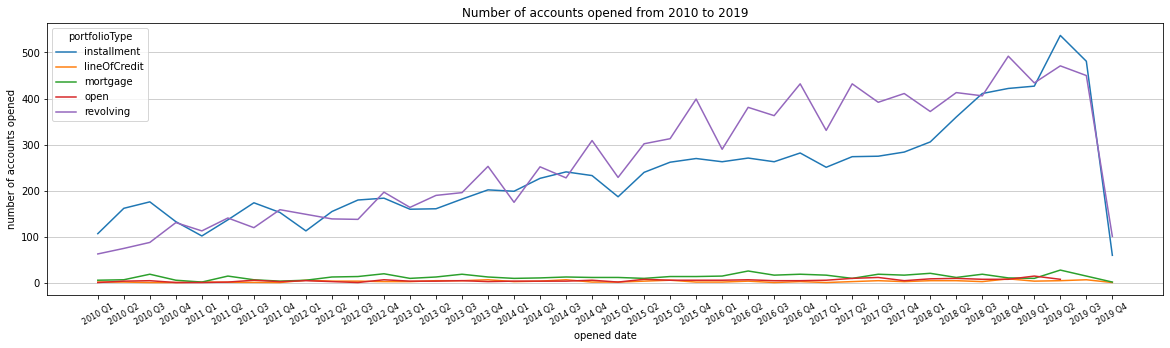

In [37]:
plt.figure(figsize=(20,5))
plt.grid(axis='y', alpha=0.75)
sns.lineplot(x='seasonOpened', y='numOfAccounts', hue='portfolioType', data=account_opened_after_2010)
plt.tick_params(axis='x', rotation=30)
plt.xticks(fontsize=8)
plt.xlabel('opened date')
plt.ylabel('number of accounts opened')
plt.title('Number of accounts opened from 2010 to 2019')
plt.show()


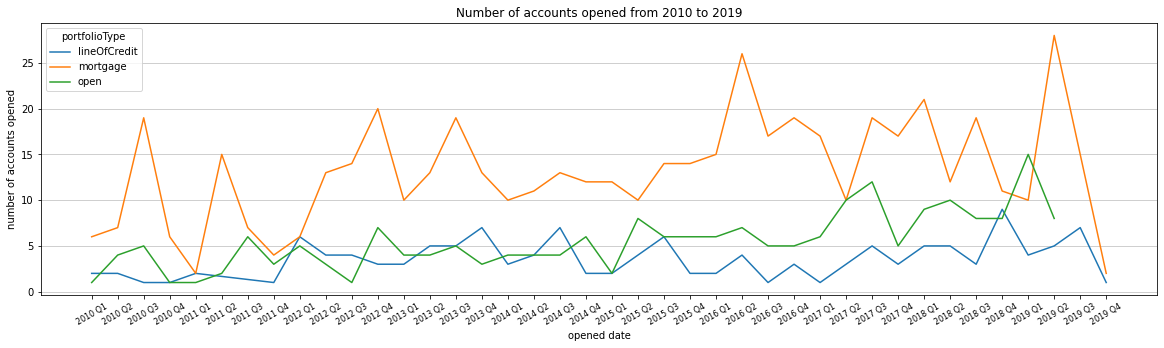

In [ ]:
account_opened_after_2010 = account_opened_after_2010[(account_opened_after_2010['portfolioType'] == 'mortgage') | (account_opened_after_2010['portfolioType'] == 'open') | (account_opened_after_2010['portfolioType'] == 'lineOfCredit')]

plt.figure(figsize=(20,5))
plt.grid(axis='y', alpha=0.75)
sns.lineplot(x='seasonOpened', y='numOfAccounts', hue='portfolioType', data=account_opened_after_2010)
plt.tick_params(axis='x', rotation=30)
plt.xticks(fontsize=8)
plt.xlabel('opened date')
plt.ylabel('number of accounts opened')
plt.title('Number of accounts opened from 2010 to 2019')

plt.show()

In [56]:
user_data = data[['user_id', 'portfolioType', 'dateOpened']].copy()
user_data = user_data[user_data['dateOpened'].notnull()]
user_data.head(5)

,user_id,portfolioType,dateOpened
0,5dbb7b29f50df923e06c9970,revolving,2019-07-17
1,5dbb7b29f50df923e06c9970,installment,2015-04-18
2,5dbb7b29f50df923e06c9970,installment,2019-05-09
3,5dbb7b29f50df923e06c9970,installment,2014-06-21
4,5dbb7b29f50df923e06c9970,installment,2015-11-06


In [57]:
def convert_date_to_year(date):
  return f'{date.year}'

In [58]:
user_data['yearOpened'] = user_data['dateOpened'].apply(convert_date_to_year)
user_data.head(5)

,user_id,portfolioType,dateOpened,yearOpened
0,5dbb7b29f50df923e06c9970,revolving,2019-07-17,2019
1,5dbb7b29f50df923e06c9970,installment,2015-04-18,2015
2,5dbb7b29f50df923e06c9970,installment,2019-05-09,2019
3,5dbb7b29f50df923e06c9970,installment,2014-06-21,2014
4,5dbb7b29f50df923e06c9970,installment,2015-11-06,2015


In [59]:
new_user = user_data.groupby(['user_id'])[['yearOpened']].min()
new_user = new_user.reset_index()

In [60]:
new_user_opened = new_user.groupby(['yearOpened'])[['user_id']].count()
new_user_opened = new_user_opened.reset_index()

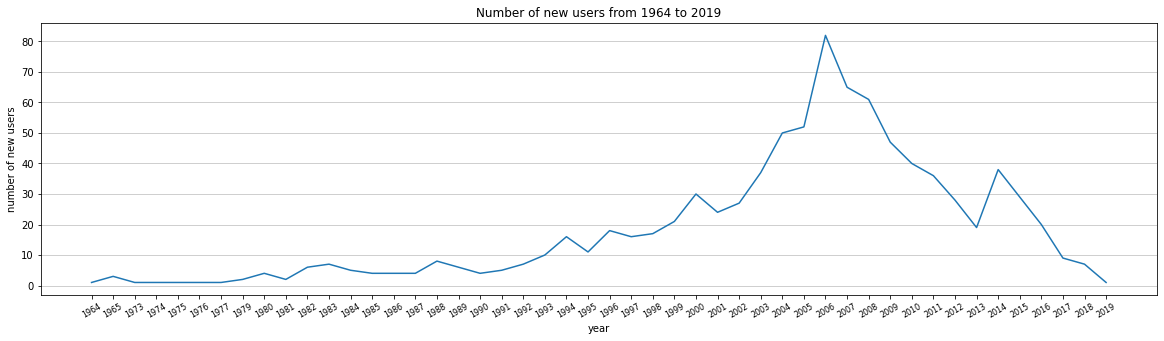

In [62]:
plt.figure(figsize=(20,5))
plt.grid(axis='y', alpha=0.75)
sns.lineplot(x=new_user_opened['yearOpened'], y=new_user_opened['user_id'], data=new_user_opened)
plt.tick_params(axis='x', rotation=30)
plt.xticks(fontsize=8)
plt.xlabel('year')
plt.ylabel('number of new users')
plt.title('Number of new users from 1964 to 2019')

plt.show()

In [63]:
revolving_data = data[data['portfolioType'] == 'revolving']

In [65]:
condition_1 = revolving_data['creditLimit'].notnull()
condition_2 = revolving_data['currentBalance'].notnull()
condition_3 = revolving_data['dateClosed'].isnull()

revolving_data = revolving_data[condition_1 & condition_2 & condition_3]
revolving_data.head(5)

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled
0,1,5dbb7b2af50df923e06c9973,0,5dbb7b29f50df923e06c9970,revolving,400.0,257.0,150.0,MIN,8.0,2019-07-17,2019-10-12,NaT,2019-09-03,2019-11-01 00:24:10.245
32,33,5dbb7eb7f50df923e06c997a,0,5dbb7eb6f50df923e06c9977,revolving,4020.0,2416.0,2002.0,MIN,92.0,2013-05-16,2019-10-25,NaT,2019-10-22,2019-11-01 00:39:19.641
33,34,5dbb7eb7f50df923e06c997a,1,5dbb7eb6f50df923e06c9977,revolving,1800.0,1167.0,0.0,NaN,NaN,2009-05-16,2019-10-23,NaT,2015-10-05,2019-11-01 00:39:19.641
34,35,5dbb7eb7f50df923e06c997a,2,5dbb7eb6f50df923e06c9977,revolving,10000.0,8127.0,7013.0,NaN,NaN,2010-07-30,2019-10-23,NaT,2019-10-16,2019-11-01 00:39:19.641
35,36,5dbb7eb7f50df923e06c997a,3,5dbb7eb6f50df923e06c9977,revolving,1800.0,0.0,0.0,NaN,NaN,2018-08-12,2019-10-22,NaT,2018-08-12,2019-11-01 00:39:19.641


In [66]:
def convert_date_to_month(date):
  month = ''
  if date.month < 10:
    month = '0' + str(date.month)
  else:
    month = str(date.month)
  return f'{date.year}-{month}';

In [69]:
clean_revolving_data = revolving_data[['dateReported', 'currentBalance', 'creditLimit']].copy()
clean_revolving_data['month'] = clean_revolving_data['dateReported'].apply(convert_date_to_month)
clean_revolving_data['utilization'] = clean_revolving_data['currentBalance'] / clean_revolving_data['creditLimit']
clean_revolving_data.head(5)

,dateReported,currentBalance,creditLimit,month,utilization
0,2019-10-12,150.0,400.0,2019-10,0.37500
32,2019-10-25,2002.0,4020.0,2019-10,0.49801
33,2019-10-23,0.0,1800.0,2019-10,0.00000
34,2019-10-23,7013.0,10000.0,2019-10,0.70130
35,2019-10-22,0.0,1800.0,2019-10,0.00000


In [77]:
revolving_utilization = clean_revolving_data.groupby(['month'])[['utilization']].mean()
revolving_utilization = revolving_utilization.reset_index()
revolving_utilization

,month,utilization
0,2010-04,0.000000
1,2010-05,0.000000
2,2010-10,0.000000
3,2010-12,0.000000
4,2011-04,0.000000
...,...,...
70,2019-07,0.000000
71,2019-08,0.498050
72,2019-09,0.528242
73,2019-10,0.616804


In [84]:
def find_data_after_2019(date):
  return int(date.split('-')[0]) >= 2019

In [85]:
revolving_utilization_2019 = revolving_utilization[revolving_utilization['month'].apply(find_data_after_2019)]
revolving_utilization_2019

,month,utilization
64,2019-01,0.224659
65,2019-02,0.000000
66,2019-03,0.000000
67,2019-04,0.000000
68,2019-05,0.000000
69,2019-06,0.073333
70,2019-07,0.000000
71,2019-08,0.498050
72,2019-09,0.528242
73,2019-10,0.616804


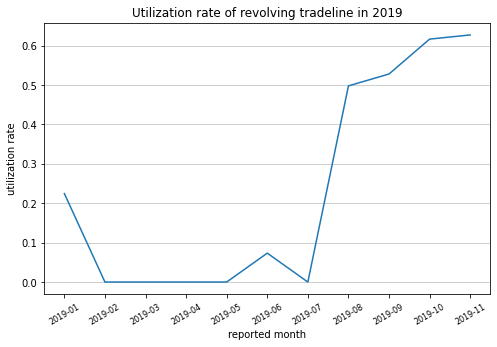

In [92]:
plt.figure(figsize=(8,5))
plt.grid(axis='y', alpha=0.75)
sns.lineplot(data=revolving_utilization_2019, x='month', y='utilization')
plt.tick_params(axis='x', rotation=30)
plt.xticks(fontsize=8)
plt.xlabel('reported month')
plt.ylabel('utilization rate')
plt.title('Utilization rate of revolving tradeline in 2019')
plt.show()

In [95]:
time_limit = timedelta(days=365)
mask_1 = revolving_data['currentBalance'] == 0
mask_2 = revolving_data['dateReported'] - revolving_data['mostRecentPayment_date'] > time_limit

inactive_accounts = revolving_data[mask_1 & mask_2]
inactive_accounts.head(5)

,id,credit_report_id,tradeline_index,user_id,portfolioType,creditLimit,highCredit,currentBalance,terms_in_month,scheduledMonthlyPayment,dateOpened,dateReported,dateClosed,mostRecentPayment_date,dataPulled,month,utilization
33,34,5dbb7eb7f50df923e06c997a,1,5dbb7eb6f50df923e06c9977,revolving,1800.0,1167.0,0.0,NaN,NaN,2009-05-16,2019-10-23,NaT,2015-10-05,2019-11-01 00:39:19.641,2019-10,0.0
35,36,5dbb7eb7f50df923e06c997a,3,5dbb7eb6f50df923e06c9977,revolving,1800.0,0.0,0.0,NaN,NaN,2018-08-12,2019-10-22,NaT,2018-08-12,2019-11-01 00:39:19.641,2019-10,0.0
96,97,5dbb8611f50df923e06c997f,10,5dbb85cbf50df923e06c997d,revolving,10000.0,2375.0,0.0,NaN,NaN,2015-09-17,2019-10-04,NaT,2018-07-13,2019-11-01 01:10:41.547,2019-10,0.0
113,114,5dbc3d6ef50df923e06c9992,1,5dbc3d6df50df923e06c998f,revolving,790.0,158.0,0.0,NaN,NaN,2016-08-12,2019-10-12,NaT,2017-06-02,2019-11-01 14:13:02.222,2019-10,0.0
633,634,5dbc899af50df923e06c9a1f,4,5dbc8999f50df923e06c9a1c,revolving,1410.0,729.0,0.0,NaN,NaN,2011-09-26,2019-10-26,NaT,2017-03-10,2019-11-01 19:38:02.166,2019-10,0.0


In [96]:
len(inactive_accounts)

363

In [ ]:
inactive_accounts.to_excel('inactive_accounts.xlsx')

In [101]:
user_revolving = revolving_data.groupby('user_id')['creditLimit', 'currentBalance'].sum()
user_revolving = user_revolving.reset_index()
user_revolving.head(5)

,user_id,creditLimit,currentBalance
0,5dbb7b29f50df923e06c9970,400.0,150.0
1,5dbb7eb6f50df923e06c9977,57720.0,37181.0
2,5dbb85cbf50df923e06c997d,82800.0,10679.0
3,5dbbb2eef50df923e06c9984,12000.0,8643.0
4,5dbc3d6df50df923e06c998f,4990.0,3591.0


In [102]:
user_revolving['utilization'] = user_revolving['currentBalance'] / user_revolving['creditLimit']
user_revolving.head(5)

,user_id,creditLimit,currentBalance,utilization
0,5dbb7b29f50df923e06c9970,400.0,150.0,0.375000
1,5dbb7eb6f50df923e06c9977,57720.0,37181.0,0.644161
2,5dbb85cbf50df923e06c997d,82800.0,10679.0,0.128973
3,5dbbb2eef50df923e06c9984,12000.0,8643.0,0.720250
4,5dbc3d6df50df923e06c998f,4990.0,3591.0,0.719639


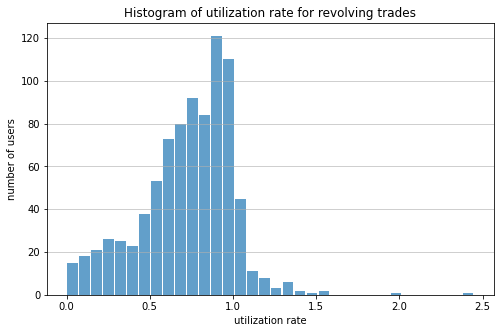

In [103]:
plt.figure(figsize=(8,5))
n, bins, patches = plt.hist(x=user_revolving['utilization'], bins='auto', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('utilization rate')
plt.ylabel('number of users')
plt.title('Histogram of utilization rate for revolving trades')
plt.show()

In [104]:
user_revolving[user_revolving['utilization'] > 0.3]

,user_id,creditLimit,currentBalance,utilization
0,5dbb7b29f50df923e06c9970,400.0,150.0,0.375000
1,5dbb7eb6f50df923e06c9977,57720.0,37181.0,0.644161
3,5dbbb2eef50df923e06c9984,12000.0,8643.0,0.720250
4,5dbc3d6df50df923e06c998f,4990.0,3591.0,0.719639
5,5dbc401ff50df923e06c9999,23250.0,20140.0,0.866237
...,...,...,...,...
854,5de183cde1c4624e16eb895c,39500.0,21531.0,0.545089
855,5de18772e1c4624e16eb8963,18050.0,13296.0,0.736620
856,5de18cd8e1c4624e16eb896a,1100.0,989.0,0.899091
857,5de19302e1c4624e16eb897a,19000.0,17545.0,0.923421


In [105]:
len(user_revolving[user_revolving['utilization'] > 0.3]) / len(user_revolving)

0.9010477299185099

In [108]:
len(user_revolving[user_revolving['utilization'] > 1]) / len(user_revolving)

0.10593713620488941

In [112]:
user_revolving_table = {
    'utilization <= 30%': [len(user_revolving[user_revolving['utilization'] <= 0.3]) / len(user_revolving)],
    'utilization > 30%': [len(user_revolving[user_revolving['utilization'] > 0.3]) / len(user_revolving)],
    'utilization > 50%': [len(user_revolving[user_revolving['utilization'] > 0.5]) / len(user_revolving)],
    'utilization > 100%': [len(user_revolving[user_revolving['utilization'] > 1]) / len(user_revolving)]
}
user_revolving_df = pd.DataFrame(user_revolving_table)
user_revolving_df

,utilization <= 30%,utilization > 30%,utilization > 50%,utilization > 100%
0,0.098952,0.901048,0.807916,0.105937
